## Majority vote: from generated results to majority score

generate/MATH.py -- verifier/majority_starter.py -- evaluate/majority_eval.py -- evaluate/score_compute.py
                 -- bash evaluate.sh -- Coverage(this notebook)

In [2]:
import subprocess
import os
import argparse
from tqdm import tqdm


In [2]:
# Turn generated responses into majority vote results, with range of majority as variable

import subprocess
import os
import argparse
from tqdm import tqdm

# Set environment variables
env = os.environ.copy()

ranges = list(range(1, 512, 10))

for range_count in tqdm(ranges):
    command = f'''CUDA_VISIBLE_DEVICES=0 python /orion/u/yrichard/large_language_monkeys/llmonk/verifier/math_majority.py \
    samples_dir=/orion/u/yrichard/large_language_monkeys/results/math_samples_1_new \
    save_dir=/orion/u/yrichard/large_language_monkeys/results/math_majority_1_new_{range_count} \
    offset=0 \
    stride=1 \
    limit=128 \
    majority_range={range_count} \
    dset=math
    '''

    result = subprocess.run(command, shell=True, env=env)

    if result.returncode == 0:
        print(f"Script executed successfully for range {range_count}")
    else:
        print(f"Script failed with return code {result.returncode} for range {range_count}")

  0%|          | 0/52 [00:00<?, ?it/s]

WARNING 09-01 21:10:58 _custom_ops.py:15] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')
WARNING 09-01 21:11:05 _custom_ops.py:15] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')


Loading generations: 128it [00:00, 13209.11it/s]


Taking majority on 128 problems.


Loading generations: 128it [00:00, 14030.34it/s]


Taking majority on 128 problems.


Killed
  2%|▏         | 1/52 [01:25<1:12:40, 85.49s/it]

Script failed with return code 137 for range 1
WARNING 09-01 21:11:54 _custom_ops.py:15] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')


Loading generations: 128it [00:00, 13545.72it/s]


Taking majority on 128 problems.


  4%|▍         | 2/52 [02:07<49:45, 59.72s/it]  

Script executed successfully for range 11
WARNING 09-01 21:12:27 _custom_ops.py:15] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')


Loading generations: 128it [00:00, 20703.03it/s]


Taking majority on 128 problems.


  6%|▌         | 3/52 [05:35<1:44:06, 127.49s/it]

Script executed successfully for range 21
WARNING 09-01 21:16:21 _custom_ops.py:15] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')


Loading generations: 128it [00:00, 14313.89it/s]


Taking majority on 128 problems.


In [ ]:
# Turn majority vote results into evaluation results

import subprocess
import os
import argparse
from tqdm import tqdm

# Set environment variables
env = os.environ.copy()

ranges = list(range(1, 1024, 10))

for range_count in tqdm(ranges):
    command = f'''python ../../llmonk/evaluate/math_datasets_majority.py \
    samples_dir=/home/richard/Downloads/large_language_monkeys/results/math_majority_1_{range_count} \
    save_dir=/home/richard/Downloads/large_language_monkeys/results/math_eval_majority_1_{range_count} \
    offset=0 \
    stride=1 \
    limit=128 \
    dset=math
    '''

    result = subprocess.run(command, shell=True, env=env)

    if result.returncode == 0:
        print(f"Script executed successfully for range {range_count}")
    else:
        print(f"Script failed with return code {result.returncode} for range {range_count}")

In [3]:
from pathlib import Path
import yaml

def load_yaml(path: Path):
    with open(path, "r") as f:
        data = yaml.load(f, Loader=yaml.CLoader)

    return data

In [8]:
# Load in the evaluation results as a score dict

from pathlib import Path
import yaml
from tqdm import tqdm

# Directory containing YAML files
scores = {}

for range_count in tqdm(range(1, 1024, 10)):
    checks_dir = Path(f'/orion/u/yrichard/large_language_monkeys/results/math_eval_majority_1_{range_count}')

    # Iterate through all YAML files in the directory
    correct_count = 0
    total_count = 0

    for yaml_file in checks_dir.glob('*.yaml'):
        total_count += 1
        data = load_yaml(yaml_file)
        checks = data['is_corrects']
        if True in checks:
            correct_count += 1
            continue

    score = correct_count / total_count
    scores[range_count] = score



  5%|▍         | 5/103 [08:13<2:38:11, 96.85s/it] Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f0c91e04950>>
Traceback (most recent call last):
  File "/orion/u/yrichard/miniconda3/envs/llmonk/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


  6%|▌         | 6/103 [09:50<2:36:39, 96.90s/it]

: 

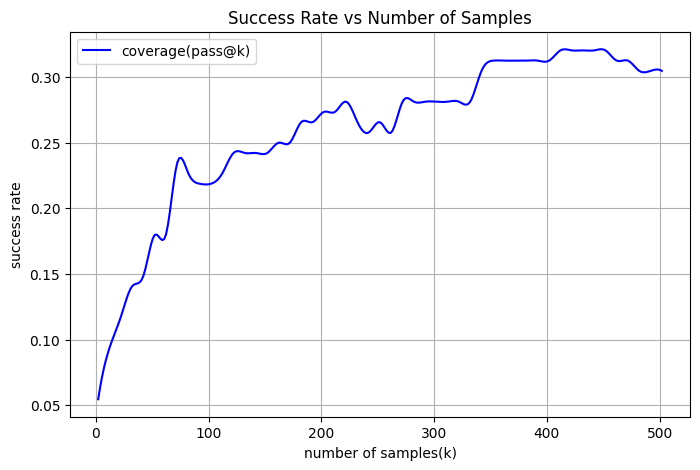

In [ ]:
# Plot the scores

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


# Extracting x and y values from the dictionary where key < 512
x_vals = [key for key in scores.keys() if key < 512]
y_vals = [scores[key] for key in x_vals]

# Creating a smooth curve using spline interpolation
x_new = np.linspace(min(x_vals), max(x_vals), 300)  # More points for a smoother curve
spl = make_interp_spline(x_vals, y_vals, k=3)  # k=3 for cubic spline
y_smooth = spl(x_new)

# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(x_new, y_smooth, color='blue', label='Success rate(majority)')

# Adding annotations and labels
plt.xlabel('number of samples(k)')
plt.ylabel('success rate')
plt.title('Success Rate vs Number of Samples')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

## Coverage: calculate and plot 

In [35]:
from pathlib import Path
import yaml

def load_yaml(path: Path):
    with open(path, "r") as f:
        data = yaml.load(f, Loader=yaml.CLoader)

    return data

In [36]:
# Loading eval results of coverage

from pathlib import Path
import yaml
from tqdm import tqdm

# Directory containing YAML files
checks_dir = Path('/home/richard/Downloads/large_language_monkeys/results/math_eval_8')


# Iterate through all YAML files in the directory
x_values = list(range(0, 512, 10))
results = {}

for x in tqdm(x_values):

    correct_count = 0
    total_count = 0

    for yaml_file in checks_dir.glob('*.yaml'):
        total_count += 1
        data = load_yaml(yaml_file)
        checks = data['is_corrects']
        if True in checks[:x]:
            correct_count += 1
            continue
    
    results[x] = correct_count/total_count


  0%|          | 0/52 [00:00<?, ?it/s]

100%|██████████| 52/52 [00:41<00:00,  1.25it/s]


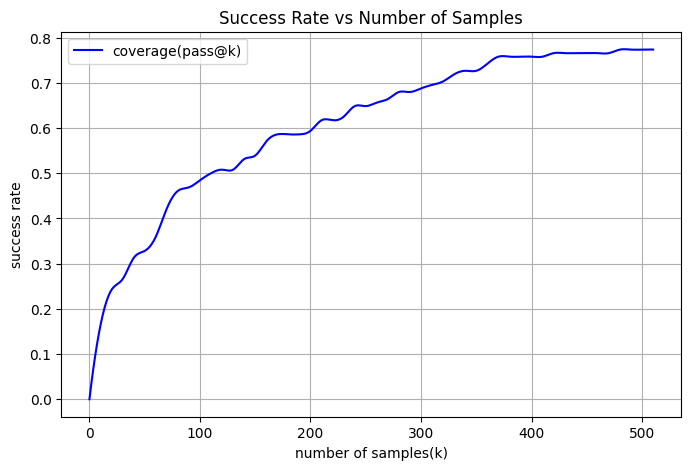

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


# Extracting x and y values from the dictionary where key < 512
x_vals = [key for key in results.keys() if key < 512]
y_vals = [results[key] for key in x_vals]

# Creating a smooth curve using spline interpolation
x_new = np.linspace(min(x_vals), max(x_vals), 300)  # More points for a smoother curve
spl = make_interp_spline(x_vals, y_vals, k=3)  # k=3 for cubic spline
y_smooth = spl(x_new)

# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(x_new, y_smooth, color='blue', label='coverage(pass@k)')

# Adding annotations and labels
plt.xlabel('number of samples(k)')
plt.ylabel('success rate')
plt.title('Success Rate vs Number of Samples')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

In [53]:
# import json

# with open('/home/richard/Downloads/large_language_monkeys/scores/scores_8.json', 'w') as file:
#     json.dump(scores, file, indent=4)

# with open('/home/richard/Downloads/large_language_monkeys/scores/results_8.json', 'w') as file:
#     json.dump(results, file, indent=4)

In [39]:
len(checks)

512

In [40]:
len(results)

52

## Combine coverage with majority success rate

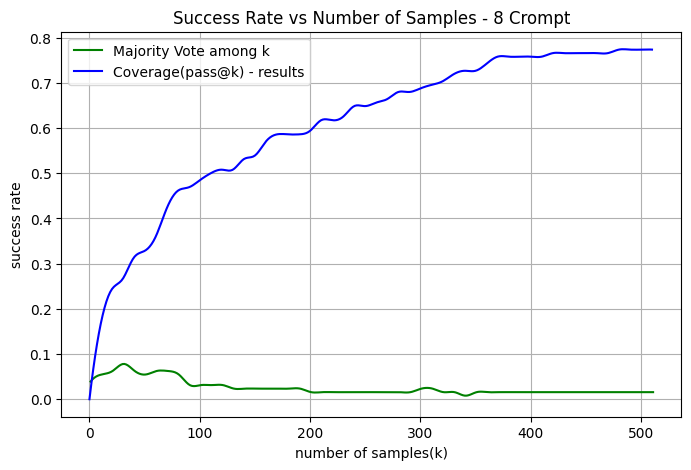

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Assuming 'scores' and 'results' are dictionaries you have defined
# Example data (replace with your actual data):
# scores = {100: 0.1, 200: 0.2, 300: 0.3, 400: 0.4, 500: 0.5}
# results = {100: 0.05, 200: 0.15, 300: 0.25, 400: 0.35, 500: 0.45}

# Extracting x and y values for 'scores'
# x_vals_scores = [key for key in scores.keys() if key < 512]
x_vals_scores = [key for key in scores.keys()]
y_vals_scores = [scores[key] for key in x_vals_scores]

# Extracting x and y values for 'results'
# x_vals_results = [key for key in results.keys() if key < 512]
x_vals_results = [key for key in results.keys()]
y_vals_results = [results[key] for key in x_vals_results]

# Creating smooth curves using spline interpolation for 'scores'
x_new_scores = np.linspace(min(x_vals_scores), max(x_vals_scores), 300)
spl_scores = make_interp_spline(x_vals_scores, y_vals_scores, k=3)
y_smooth_scores = spl_scores(x_new_scores)

# Creating smooth curves using spline interpolation for 'results'
x_new_results = np.linspace(min(x_vals_results), max(x_vals_results), 300)
spl_results = make_interp_spline(x_vals_results, y_vals_results, k=3)
y_smooth_results = spl_results(x_new_results)

# Plotting the graphs
plt.figure(figsize=(8, 5))
plt.plot(x_new_scores, y_smooth_scores, color='green', label='Majority Vote among k')
plt.plot(x_new_results, y_smooth_results, color='blue', label='Coverage(pass@k) - results')

# Adding annotations and labels
plt.xlabel('number of samples(k)')
plt.ylabel('success rate')
plt.title('Success Rate vs Number of Samples - 8 Crompt')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


In [2]:
# Load results from default
import json

# Load results_1
with open('/orion/u/yrichard/large_language_monkeys/scores/results_1.json', 'r') as file:
    results_1 = {int(key): float(value) for key, value in json.load(file).items()}

# Load results_2
with open('/orion/u/yrichard/large_language_monkeys/scores/results_2.json', 'r') as file:
    results_2 = {int(key): float(value) for key, value in json.load(file).items()}

# Load results_4
with open('/orion/u/yrichard/large_language_monkeys/scores/results_4.json', 'r') as file:
    results_4 = {int(key): float(value) for key, value in json.load(file).items()}

# Load results_8
with open('/orion/u/yrichard/large_language_monkeys/scores/results_8.json', 'r') as file:
    results_8 = {int(key): float(value) for key, value in json.load(file).items()}

# for i in range(0, 8):
#     with open(f'/orion/u/yrichard/large_language_monkeys/scores/results_8_prompt{i}.json', 'r') as file:
#         globals()[f'results_8_prompt{i}'] = {int(key): float(value) for key, value in json.load(file).items()}

# Load results_32
with open('/orion/u/yrichard/large_language_monkeys/scores/results_32.json', 'r') as file:
    results_32 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_1
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_1.json', 'r') as file:
    scores_1 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_2
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_2.json', 'r') as file:
    scores_2 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_4
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_4.json', 'r') as file:
    scores_4 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_8
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_8.json', 'r') as file:
    scores_8 = {int(key): float(value) for key, value in json.load(file).items()}

# # # Load scores_8
# for i in range(0, 8):
#     with open(f'/orion/u/yrichard/large_language_monkeys/scores/scores_8_prompt{i}.json', 'r') as file:
#         globals()[f'scores_8_prompt{i}'] = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_32
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_32.json', 'r') as file:
    scores_32 = {int(key): float(value) for key, value in json.load(file).items()}


In [1]:
# Load results from _new:
import json

# Load results_1
with open('/orion/u/yrichard/large_language_monkeys/scores/results_1_new.json', 'r') as file:
    results_1 = {int(key): float(value) for key, value in json.load(file).items()}

# Load results_2
with open('/orion/u/yrichard/large_language_monkeys/scores/results_2_new.json', 'r') as file:
    results_2 = {int(key): float(value) for key, value in json.load(file).items()}

# Load results_4
with open('/orion/u/yrichard/large_language_monkeys/scores/results_4_new.json', 'r') as file:
    results_4 = {int(key): float(value) for key, value in json.load(file).items()}

# Load results_8
with open('/orion/u/yrichard/large_language_monkeys/scores/results_8_new.json', 'r') as file:
    results_8 = {int(key): float(value) for key, value in json.load(file).items()}
    
# Load results_32
with open('/orion/u/yrichard/large_language_monkeys/scores/results_32_new.json', 'r') as file:
    results_32 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_1
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_1_new.json', 'r') as file:
    scores_1 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_2
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_2_new.json', 'r') as file:
    scores_2 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_4
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_4_new.json', 'r') as file:
    scores_4 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_8
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_8_new.json', 'r') as file:
    scores_8 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_32
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_32_new.json', 'r') as file:
    scores_32 = {int(key): float(value) for key, value in json.load(file).items()}


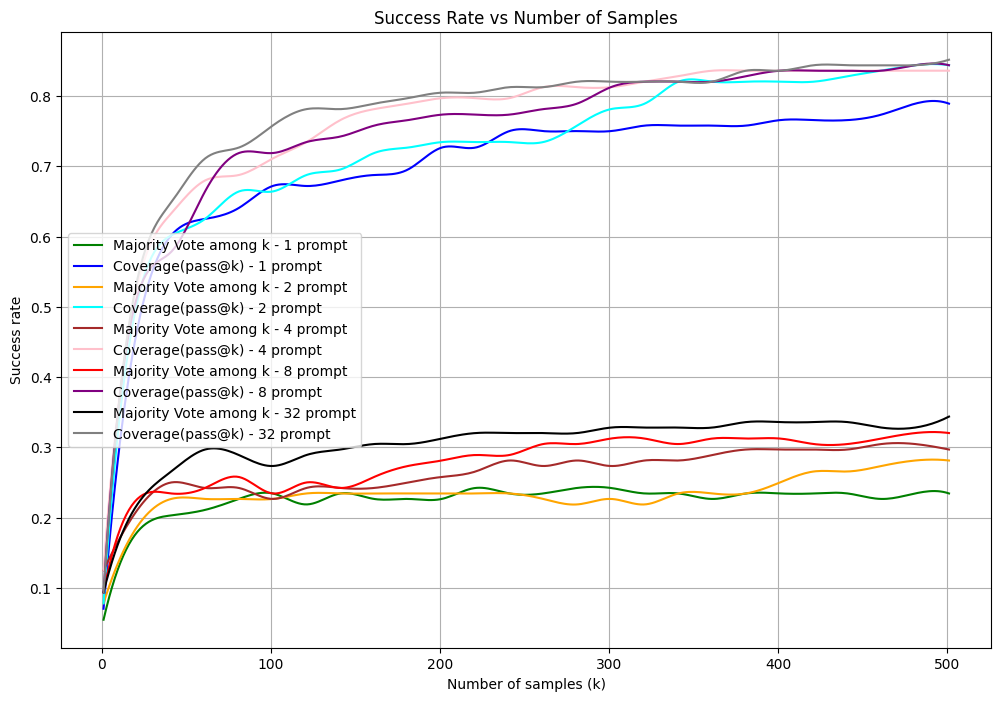

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Extracting x and y values for 'scores_1'
x_vals_scores_1 = [key for key in scores_1.keys()]
y_vals_scores_1 = [scores_1[key] for key in x_vals_scores_1]

# Extracting x and y values for 'results_1'
x_vals_results_1 = [key for key in results_1.keys()]
y_vals_results_1 = [results_1[key] for key in x_vals_results_1]

# Extracting x and y values for 'scores_2'
x_vals_scores_2 = [key for key in scores_2.keys()]
y_vals_scores_2 = [scores_2[key] for key in x_vals_scores_2]

# Extracting x and y values for 'results_2'
x_vals_results_2 = [key for key in results_2.keys()]
y_vals_results_2 = [results_2[key] for key in x_vals_results_2]

# Extracting x and y values for 'scores_4'
x_vals_scores_4 = [key for key in scores_4.keys()]
y_vals_scores_4 = [scores_4[key] for key in x_vals_scores_4]

# Extracting x and y values for 'results_4'
x_vals_results_4 = [key for key in results_4.keys()]
y_vals_results_4 = [results_4[key] for key in x_vals_results_4]

# # # Load scores_8
# for i in range(0, 8):
#     globals()[f'x_vals_scores_8_prompt{i}'] = [key for key in globals()[f'scores_8_prompt{i}'].keys()]
#     globals()[f'y_vals_scores_8_prompt{i}'] = [globals()[f'scores_8_prompt{i}'][key] for key in globals()[f'x_vals_scores_8_prompt{i}']]
#     # globals()[f'x_vals_results_8_prompt{i}'] = [key for key in globals()[f'results_8_prompt{i}'].keys()]
#     # globals()[f'y_vals_results_8_prompt{i}'] = [globals()[f'results_8_prompt{i}'][key] for key in globals()[f'x_vals_results_8_prompt{i}']]

# Extracting x and y values for 'scores_8'
x_vals_scores_8 = [key for key in scores_8.keys()]
y_vals_scores_8 = [scores_8[key] for key in x_vals_scores_8]

# Extracting x and y values for 'results_8'
x_vals_results_8 = [key for key in results_8.keys()]
y_vals_results_8 = [results_8[key] for key in x_vals_results_8]

# Extracting x and y values for 'scores_32'
x_vals_scores_32 = [key for key in scores_32.keys()]
y_vals_scores_32 = [scores_32[key] for key in x_vals_scores_32]

# Extracting x and y values for 'results_32'
x_vals_results_32 = [key for key in results_32.keys()]
y_vals_results_32 = [results_32[key] for key in x_vals_results_32]

# Creating smooth curves using spline interpolation for 'scores_1'
x_new_scores_1 = np.linspace(min(x_vals_scores_1), max(x_vals_scores_1), 300)
spl_scores_1 = make_interp_spline(x_vals_scores_1, y_vals_scores_1, k=3)
y_smooth_scores_1 = spl_scores_1(x_new_scores_1)

# Creating smooth curves using spline interpolation for 'results_1'
x_new_results_1 = np.linspace(min(x_vals_results_1), max(x_vals_results_1), 300)
spl_results_1 = make_interp_spline(x_vals_results_1, y_vals_results_1, k=3)
y_smooth_results_1 = spl_results_1(x_new_results_1)

# Creating smooth curves using spline interpolation for 'scores_2'
x_new_scores_2 = np.linspace(min(x_vals_scores_2), max(x_vals_scores_2), 300)
spl_scores_2 = make_interp_spline(x_vals_scores_2, y_vals_scores_2, k=3)
y_smooth_scores_2 = spl_scores_2(x_new_scores_2)

# Creating smooth curves using spline interpolation for 'results_2'
x_new_results_2 = np.linspace(min(x_vals_results_2), max(x_vals_results_2), 300)
spl_results_2 = make_interp_spline(x_vals_results_2, y_vals_results_2, k=3)
y_smooth_results_2 = spl_results_2(x_new_results_2)

# Creating smooth curves using spline interpolation for 'scores_4'
x_new_scores_4 = np.linspace(min(x_vals_scores_4), max(x_vals_scores_4), 300)
spl_scores_4 = make_interp_spline(x_vals_scores_4, y_vals_scores_4, k=3)
y_smooth_scores_4 = spl_scores_4(x_new_scores_4)

# Creating smooth curves using spline interpolation for 'results_4'
x_new_results_4 = np.linspace(min(x_vals_results_4), max(x_vals_results_4), 300)
spl_results_4 = make_interp_spline(x_vals_results_4, y_vals_results_4, k=3)
y_smooth_results_4 = spl_results_4(x_new_results_4)

# Creating smooth curves using spline interpolation for 'scores_8'
x_new_scores_8 = np.linspace(min(x_vals_scores_8), max(x_vals_scores_8), 300)
spl_scores_8 = make_interp_spline(x_vals_scores_8, y_vals_scores_8, k=3)
y_smooth_scores_8 = spl_scores_8(x_new_scores_8)

# Creating smooth curves using spline interpolation for 'results_8'
x_new_results_8 = np.linspace(min(x_vals_results_8), max(x_vals_results_8), 300)
spl_results_8 = make_interp_spline(x_vals_results_8, y_vals_results_8, k=3)
y_smooth_results_8 = spl_results_8(x_new_results_8)

# # # Load scores_8
# for i in range(0, 8):
#     globals()[f'x_new_scores_8_prompt{i}'] = np.linspace(min(globals()[f'x_vals_scores_8_prompt{i}']), max(globals()[f'x_vals_scores_8_prompt{i}']), 300)
#     globals()[f'spl_scores_8_prompt{i}'] = make_interp_spline(globals()[f'x_vals_scores_8_prompt{i}'], globals()[f'y_vals_scores_8_prompt{i}'], k=3)
#     globals()[f'y_smooth_scores_8_prompt{i}'] = globals()[f'spl_scores_8_prompt{i}'](globals()[f'x_new_scores_8_prompt{i}'])
#     # globals()[f'x_new_results_8_prompt{i}'] = np.linspace(min(globals()[f'x_vals_results_8_prompt{i}']), max(globals()[f'x_vals_results_8_prompt{i}']), 300)
#     # globals()[f'spl_results_8_prompt{i}'] = make_interp_spline(globals()[f'x_vals_results_8_prompt{i}'], globals()[f'y_vals_results_8_prompt{i}'], k=3)
#     # globals()[f'y_smooth_results_8_prompt{i}'] = globals()[f'spl_results_8_prompt{i}'](globals()[f'x_new_results_8_prompt{i}'])

# Creating smooth curves using spline interpolation for 'scores_32'
x_new_scores_32 = np.linspace(min(x_vals_scores_32), max(x_vals_scores_32), 300)
spl_scores_32 = make_interp_spline(x_vals_scores_32, y_vals_scores_32, k=3)
y_smooth_scores_32 = spl_scores_32(x_new_scores_32)

# Creating smooth curves using spline interpolation for 'results_32'
x_new_results_32 = np.linspace(min(x_vals_results_32), max(x_vals_results_32), 300)
spl_results_32 = make_interp_spline(x_vals_results_32, y_vals_results_32, k=3)
y_smooth_results_32 = spl_results_32(x_new_results_32)

# Plotting the graphs
plt.figure(figsize=(12, 8))
plt.plot(x_new_scores_1, y_smooth_scores_1, color='green', label='Majority Vote among k - 1 prompt')
plt.plot(x_new_results_1, y_smooth_results_1, color='blue', label='Coverage(pass@k) - 1 prompt')
plt.plot(x_new_scores_2, y_smooth_scores_2, color='orange', label='Majority Vote among k - 2 prompt')
plt.plot(x_new_results_2, y_smooth_results_2, color='cyan', label='Coverage(pass@k) - 2 prompt')
plt.plot(x_new_scores_4, y_smooth_scores_4, color='brown', label='Majority Vote among k - 4 prompt')
plt.plot(x_new_results_4, y_smooth_results_4, color='pink', label='Coverage(pass@k) - 4 prompt')
plt.plot(x_new_scores_8, y_smooth_scores_8, color='red', label='Majority Vote among k - 8 prompt')
plt.plot(x_new_results_8, y_smooth_results_8, color='purple', label='Coverage(pass@k) - 8 prompt')
# for i in range(0, 8):
#     plt.plot(globals()[f'x_new_scores_8_prompt{i}'], globals()[f'y_smooth_scores_8_prompt{i}'], color='red', label='Majority Vote among k - 8 prompt')
#     # plt.plot(globals()[f'x_new_results_8_prompt{i}'], globals()[f'y_smooth_results_8_prompt{i}'], color='purple', label='Coverage(pass@k) - 8 prompt')

plt.plot(x_new_scores_32, y_smooth_scores_32, color='black', label='Majority Vote among k - 32 prompt')
plt.plot(x_new_results_32, y_smooth_results_32, color='grey', label='Coverage(pass@k) - 32 prompt')

# Adding annotations and labels
plt.xlabel('Number of samples (k)')
plt.ylabel('Success rate')
plt.title('Success Rate vs Number of Samples')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


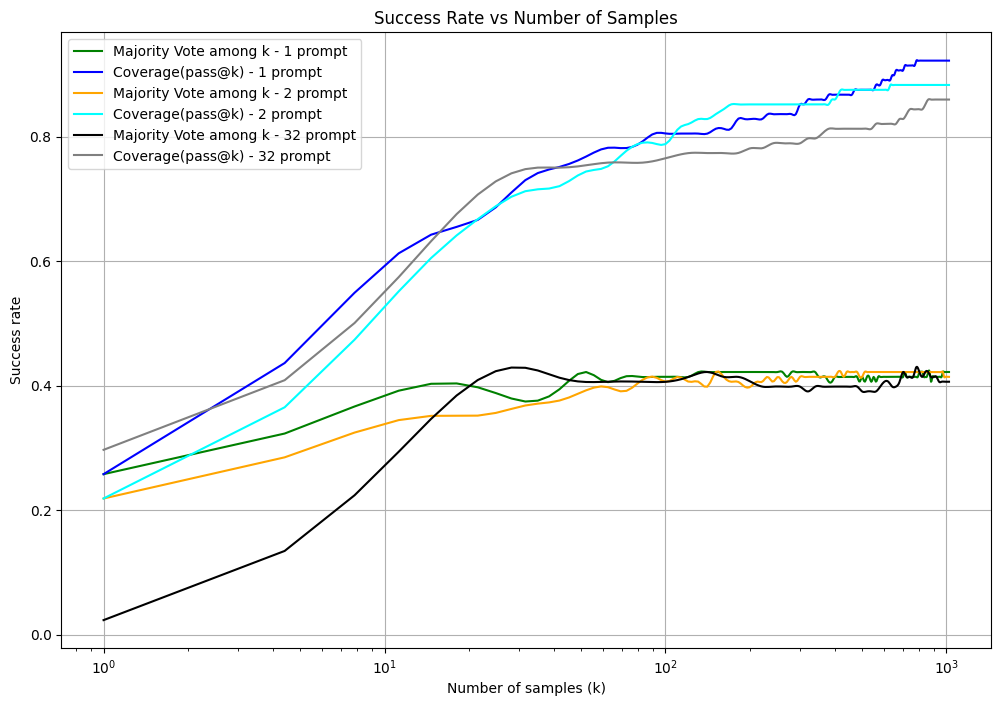

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Extracting x and y values for 'scores_1'
x_vals_scores_1 = [key for key in scores_1.keys()]
y_vals_scores_1 = [scores_1[key] for key in x_vals_scores_1]

# Extracting x and y values for 'results_1'
x_vals_results_1 = [key for key in results_1.keys()]
y_vals_results_1 = [results_1[key] for key in x_vals_results_1]

# Extracting x and y values for 'scores_2'
x_vals_scores_2 = [key for key in scores_2.keys()]
y_vals_scores_2 = [scores_2[key] for key in x_vals_scores_2]

# Extracting x and y values for 'results_2'
x_vals_results_2 = [key for key in results_2.keys()]
y_vals_results_2 = [results_2[key] for key in x_vals_results_2]

# # Extracting x and y values for 'scores_4'
# x_vals_scores_4 = [key for key in scores_4.keys()]
# y_vals_scores_4 = [scores_4[key] for key in x_vals_scores_4]

# # Extracting x and y values for 'results_4'
# x_vals_results_4 = [key for key in results_4.keys()]
# y_vals_results_4 = [results_4[key] for key in x_vals_results_4]

# # Extracting x and y values for 'scores_8'
# x_vals_scores_8 = [key for key in scores_8.keys()]
# y_vals_scores_8 = [scores_8[key] for key in x_vals_scores_8]

# # Extracting x and y values for 'results_8'
# x_vals_results_8 = [key for key in results_8.keys()]
# y_vals_results_8 = [results_8[key] for key in x_vals_results_8]

# Extracting x and y values for 'scores_32'
x_vals_scores_32 = [key for key in scores_32.keys()]
y_vals_scores_32 = [scores_32[key] for key in x_vals_scores_32]

# Extracting x and y values for 'results_32'
x_vals_results_32 = [key for key in results_32.keys()]
y_vals_results_32 = [results_32[key] for key in x_vals_results_32]

# Creating smooth curves using spline interpolation for 'scores_1'
x_new_scores_1 = np.linspace(min(x_vals_scores_1), max(x_vals_scores_1), 300)
spl_scores_1 = make_interp_spline(x_vals_scores_1, y_vals_scores_1, k=3)
y_smooth_scores_1 = spl_scores_1(x_new_scores_1)

# Creating smooth curves using spline interpolation for 'results_1'
x_new_results_1 = np.linspace(min(x_vals_results_1), max(x_vals_results_1), 300)
spl_results_1 = make_interp_spline(x_vals_results_1, y_vals_results_1, k=3)
y_smooth_results_1 = spl_results_1(x_new_results_1)

# Creating smooth curves using spline interpolation for 'scores_2'
x_new_scores_2 = np.linspace(min(x_vals_scores_2), max(x_vals_scores_2), 300)
spl_scores_2 = make_interp_spline(x_vals_scores_2, y_vals_scores_2, k=3)
y_smooth_scores_2 = spl_scores_2(x_new_scores_2)

# Creating smooth curves using spline interpolation for 'results_2'
x_new_results_2 = np.linspace(min(x_vals_results_2), max(x_vals_results_2), 300)
spl_results_2 = make_interp_spline(x_vals_results_2, y_vals_results_2, k=3)
y_smooth_results_2 = spl_results_2(x_new_results_2)

# # Creating smooth curves using spline interpolation for 'scores_4'
# x_new_scores_4 = np.linspace(min(x_vals_scores_4), max(x_vals_scores_4), 300)
# spl_scores_4 = make_interp_spline(x_vals_scores_4, y_vals_scores_4, k=3)
# y_smooth_scores_4 = spl_scores_4(x_new_scores_4)

# # Creating smooth curves using spline interpolation for 'results_4'
# x_new_results_4 = np.linspace(min(x_vals_results_4), max(x_vals_results_4), 300)
# spl_results_4 = make_interp_spline(x_vals_results_4, y_vals_results_4, k=3)
# y_smooth_results_4 = spl_results_4(x_new_results_4)

# # Creating smooth curves using spline interpolation for 'scores_8'
# x_new_scores_8 = np.linspace(min(x_vals_scores_8), max(x_vals_scores_8), 300)
# spl_scores_8 = make_interp_spline(x_vals_scores_8, y_vals_scores_8, k=3)
# y_smooth_scores_8 = spl_scores_8(x_new_scores_8)

# # Creating smooth curves using spline interpolation for 'results_8'
# x_new_results_8 = np.linspace(min(x_vals_results_8), max(x_vals_results_8), 300)
# spl_results_8 = make_interp_spline(x_vals_results_8, y_vals_results_8, k=3)
# y_smooth_results_8 = spl_results_8(x_new_results_8)

# Creating smooth curves using spline interpolation for 'scores_32'
x_new_scores_32 = np.linspace(min(x_vals_scores_32), max(x_vals_scores_32), 300)
spl_scores_32 = make_interp_spline(x_vals_scores_32, y_vals_scores_32, k=3)
y_smooth_scores_32 = spl_scores_32(x_new_scores_32)

# Creating smooth curves using spline interpolation for 'results_32'
x_new_results_32 = np.linspace(min(x_vals_results_32), max(x_vals_results_32), 300)
spl_results_32 = make_interp_spline(x_vals_results_32, y_vals_results_32, k=3)
y_smooth_results_32 = spl_results_32(x_new_results_32)

# Plotting the graphs
plt.figure(figsize=(12, 8))
plt.plot(x_new_scores_1, y_smooth_scores_1, color='green', label='Majority Vote among k - 1 prompt')
plt.plot(x_new_results_1, y_smooth_results_1, color='blue', label='Coverage(pass@k) - 1 prompt')
plt.plot(x_new_scores_2, y_smooth_scores_2, color='orange', label='Majority Vote among k - 2 prompt')
plt.plot(x_new_results_2, y_smooth_results_2, color='cyan', label='Coverage(pass@k) - 2 prompt')
# plt.plot(x_new_scores_4, y_smooth_scores_4, color='brown', label='Majority Vote among k - 4 prompt')
# plt.plot(x_new_results_4, y_smooth_results_4, color='pink', label='Coverage(pass@k) - 4 prompt')
# plt.plot(x_new_scores_8, y_smooth_scores_8, color='red', label='Majority Vote among k - 8 prompt')
# plt.plot(x_new_results_8, y_smooth_results_8, color='purple', label='Coverage(pass@k) - 8 prompt')
plt.plot(x_new_scores_32, y_smooth_scores_32, color='black', label='Majority Vote among k - 32 prompt')
plt.plot(x_new_results_32, y_smooth_results_32, color='grey', label='Coverage(pass@k) - 32 prompt')

# Adding annotations and labels
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Number of samples (k)')
plt.ylabel('Success rate')
plt.title('Success Rate vs Number of Samples')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


In [2]:
# Load results from _new:
import json

# Load results_1_original
with open('/orion/u/yrichard/large_language_monkeys/scores/results_1_original.json', 'r') as file:
    results_1 = {int(key): float(value) for key, value in json.load(file).items()}

# Load results_1_new
with open('/orion/u/yrichard/large_language_monkeys/scores/results_1_new.json', 'r') as file:
    results_2 = {int(key): float(value) for key, value in json.load(file).items()}

# Load results_1_added
with open('/orion/u/yrichard/large_language_monkeys/scores/results_1_added.json', 'r') as file:
    results_4 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_1_original
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_1_original.json', 'r') as file:
    scores_1 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_1_new
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_1_new.json', 'r') as file:
    scores_2 = {int(key): float(value) for key, value in json.load(file).items()}

# Load scores_1_added
with open('/orion/u/yrichard/large_language_monkeys/scores/scores_1_added.json', 'r') as file:
    scores_4 = {int(key): float(value) for key, value in json.load(file).items()}

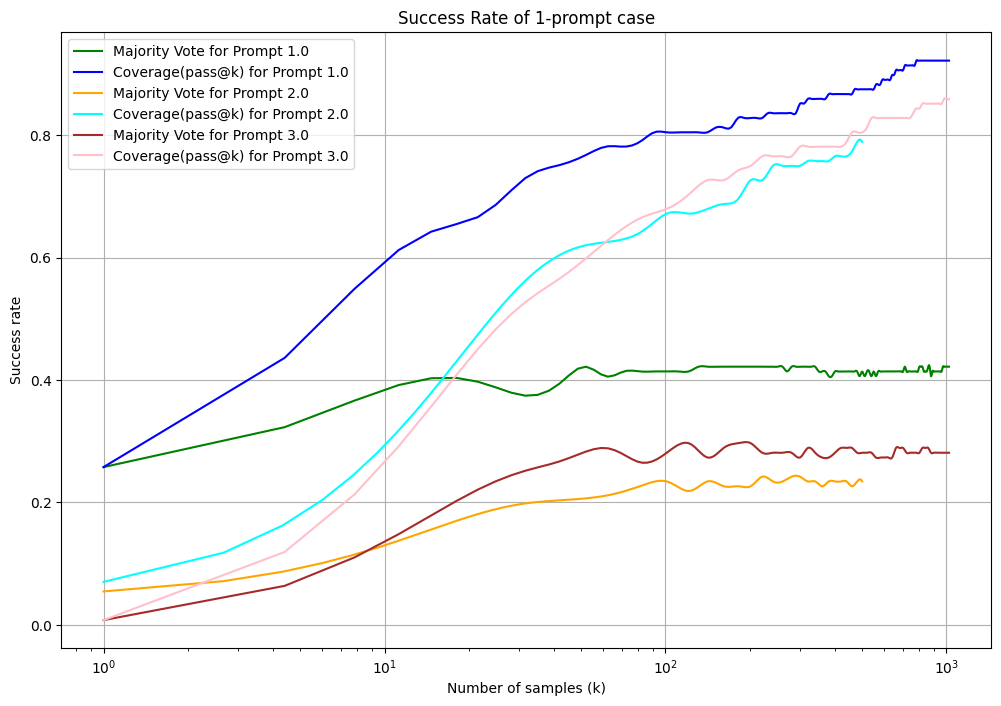

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Extracting x and y values for 'scores_1'
x_vals_scores_1 = [key for key in scores_1.keys()]
y_vals_scores_1 = [scores_1[key] for key in x_vals_scores_1]

# Extracting x and y values for 'results_1'
x_vals_results_1 = [key for key in results_1.keys()]
y_vals_results_1 = [results_1[key] for key in x_vals_results_1]

# Extracting x and y values for 'scores_2'
x_vals_scores_2 = [key for key in scores_2.keys()]
y_vals_scores_2 = [scores_2[key] for key in x_vals_scores_2]

# Extracting x and y values for 'results_2'
x_vals_results_2 = [key for key in results_2.keys()]
y_vals_results_2 = [results_2[key] for key in x_vals_results_2]

# Extracting x and y values for 'scores_4'
x_vals_scores_4 = [key for key in scores_4.keys()]
y_vals_scores_4 = [scores_4[key] for key in x_vals_scores_4]

# Extracting x and y values for 'results_4'
x_vals_results_4 = [key for key in results_4.keys()]
y_vals_results_4 = [results_4[key] for key in x_vals_results_4]


# Creating smooth curves using spline interpolation for 'scores_1'
x_new_scores_1 = np.linspace(min(x_vals_scores_1), max(x_vals_scores_1), 300)
spl_scores_1 = make_interp_spline(x_vals_scores_1, y_vals_scores_1, k=3)
y_smooth_scores_1 = spl_scores_1(x_new_scores_1)

# Creating smooth curves using spline interpolation for 'results_1'
x_new_results_1 = np.linspace(min(x_vals_results_1), max(x_vals_results_1), 300)
spl_results_1 = make_interp_spline(x_vals_results_1, y_vals_results_1, k=3)
y_smooth_results_1 = spl_results_1(x_new_results_1)

# Creating smooth curves using spline interpolation for 'scores_2'
x_new_scores_2 = np.linspace(min(x_vals_scores_2), max(x_vals_scores_2), 300)
spl_scores_2 = make_interp_spline(x_vals_scores_2, y_vals_scores_2, k=3)
y_smooth_scores_2 = spl_scores_2(x_new_scores_2)

# Creating smooth curves using spline interpolation for 'results_2'
x_new_results_2 = np.linspace(min(x_vals_results_2), max(x_vals_results_2), 300)
spl_results_2 = make_interp_spline(x_vals_results_2, y_vals_results_2, k=3)
y_smooth_results_2 = spl_results_2(x_new_results_2)

# Creating smooth curves using spline interpolation for 'scores_4'
x_new_scores_4 = np.linspace(min(x_vals_scores_4), max(x_vals_scores_4), 300)
spl_scores_4 = make_interp_spline(x_vals_scores_4, y_vals_scores_4, k=3)
y_smooth_scores_4 = spl_scores_4(x_new_scores_4)

# Creating smooth curves using spline interpolation for 'results_4'
x_new_results_4 = np.linspace(min(x_vals_results_4), max(x_vals_results_4), 300)
spl_results_4 = make_interp_spline(x_vals_results_4, y_vals_results_4, k=3)
y_smooth_results_4 = spl_results_4(x_new_results_4)

# Plotting the graphs
plt.figure(figsize=(12, 8))
plt.plot(x_new_scores_1, y_smooth_scores_1, color='green', label='Majority Vote for Prompt 1.0')
plt.plot(x_new_results_1, y_smooth_results_1, color='blue', label='Coverage(pass@k) for Prompt 1.0')
plt.plot(x_new_scores_2, y_smooth_scores_2, color='orange', label='Majority Vote for Prompt 2.0')
plt.plot(x_new_results_2, y_smooth_results_2, color='cyan', label='Coverage(pass@k) for Prompt 2.0')
plt.plot(x_new_scores_4, y_smooth_scores_4, color='brown', label='Majority Vote for Prompt 3.0')
plt.plot(x_new_results_4, y_smooth_results_4, color='pink', label='Coverage(pass@k) for Prompt 3.0')


# Adding annotations and labels
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Number of samples (k)')
plt.ylabel('Success rate')
plt.title('Success Rate of 1-prompt case')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()
